In [3]:
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\roman\PycharmProjects\testJupyter\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\roman\PycharmProjects\testJupyter\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
# Next steps ---
# Use API to get the information related to the dataset (e.g water_percentage_1000)
# Get a dataset with uptodate infromation
#

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
# Load the train data
df = pd.read_csv('../data/houses_train.csv', index_col=0)
df.shape

(20313, 19)

In [24]:
df.head(2)

,lat,long,zipcode,municipality_name,build_year,object_type_name,living_area,num_rooms,water_percentage_1000,travel_time_private_transport,travel_time_public_transport,number_of_buildings_in_hectare,number_of_apartments_in_hectare,number_of_workplaces_in_hectare,number_of_workplaces_sector_1_in_hectare,number_of_workplaces_sector_2_in_hectare,number_of_workplaces_sector_3_in_hectare,population_in_hectare,price
id,,,,,,,,,,,,,,,,,,,
0,47.038963,9.066771,8750,Glarus,1981,Wohnung,134.0,4.0,0.023596,40.0,63.0,26,48.0,7,0,3,6,75,380000.0
1,47.097042,8.522013,6318,Walchwil,2018,Wohnung,113.0,3.0,0.249219,33.0,47.0,11,27.0,3,0,3,3,57,1195000.0


In [25]:
df['object_type_name'].value_counts(dropna=False)

Wohnung             8218
Einfamilienhaus     7799
Mehrfamilienhaus    2751
Sonstiges           1545
Name: object_type_name, dtype: int64

In [26]:
df.build_year.describe()

count    20313.000000
mean      1979.861222
std         63.116038
min          1.000000
25%       1972.000000
50%       1992.000000
75%       2010.000000
max       2108.000000
Name: build_year, dtype: float64

In [27]:
# clean impossible years
df = df.drop(df[(df.build_year < 1950.0) | (df.build_year > 2022.0)].index)
df.build_year.describe()

count    17902.000000
mean      1994.287510
std         18.913342
min       1950.000000
25%       1979.000000
50%       1996.000000
75%       2012.000000
max       2022.000000
Name: build_year, dtype: float64

In [28]:
df.living_area.describe()

count    17902.000000
mean       149.028073
std         85.955385
min         17.000000
25%        107.000000
50%        136.000000
75%        170.000000
max       1999.000000
Name: living_area, dtype: float64

In [29]:
df.num_rooms.describe()

count    17902.000000
mean         4.820216
std          1.803339
min          0.000000
25%          4.000000
50%          5.000000
75%          5.500000
max         65.000000
Name: num_rooms, dtype: float64

In [30]:
#clean 0 value objects
df = df.drop(df[df.num_rooms < 1].index)
df.num_rooms.describe()

count    17836.000000
mean         4.838052
std          1.782629
min          1.000000
25%          4.000000
50%          5.000000
75%          5.500000
max         65.000000
Name: num_rooms, dtype: float64

In [31]:
# Minimize dataset to selectable values
df = df[['long', 'lat', 'zipcode', 'municipality_name', 'object_type_name', 'build_year', 'living_area', 'num_rooms', 'price']]
df.shape

(17836, 9)

In [32]:
# Split data into features and labels.
X_data = df.drop(columns='price')
y_data = df['price']

In [33]:
# Split features and labels into train (X_train, y_train) and validation set (X_val, y_val).
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, stratify=X_data['object_type_name'], test_size=0.2)

C:\Users\roman\AppData\Local\Temp\ipykernel_17508\2007079473.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\roman\AppData\Local\Temp\ipykernel_17508\2007079473.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


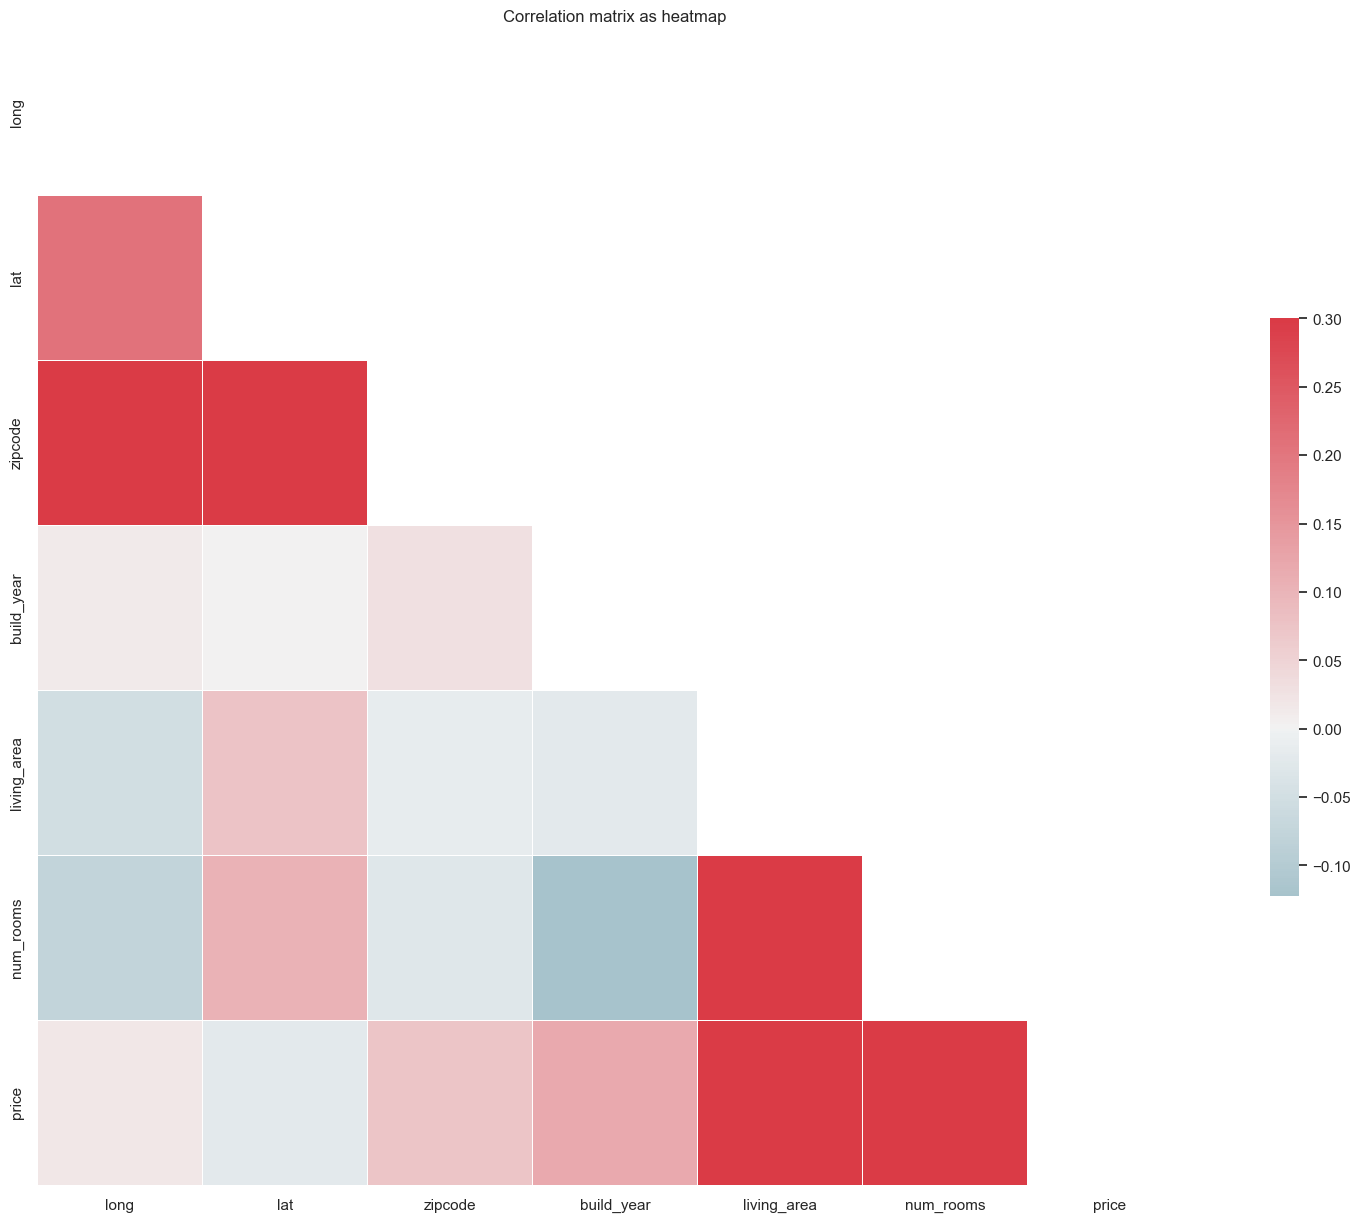

In [34]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
_, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# set fig size
sns.set(rc={'figure.figsize':(2,2)})

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

_ = plt.title("Correlation matrix as heatmap")

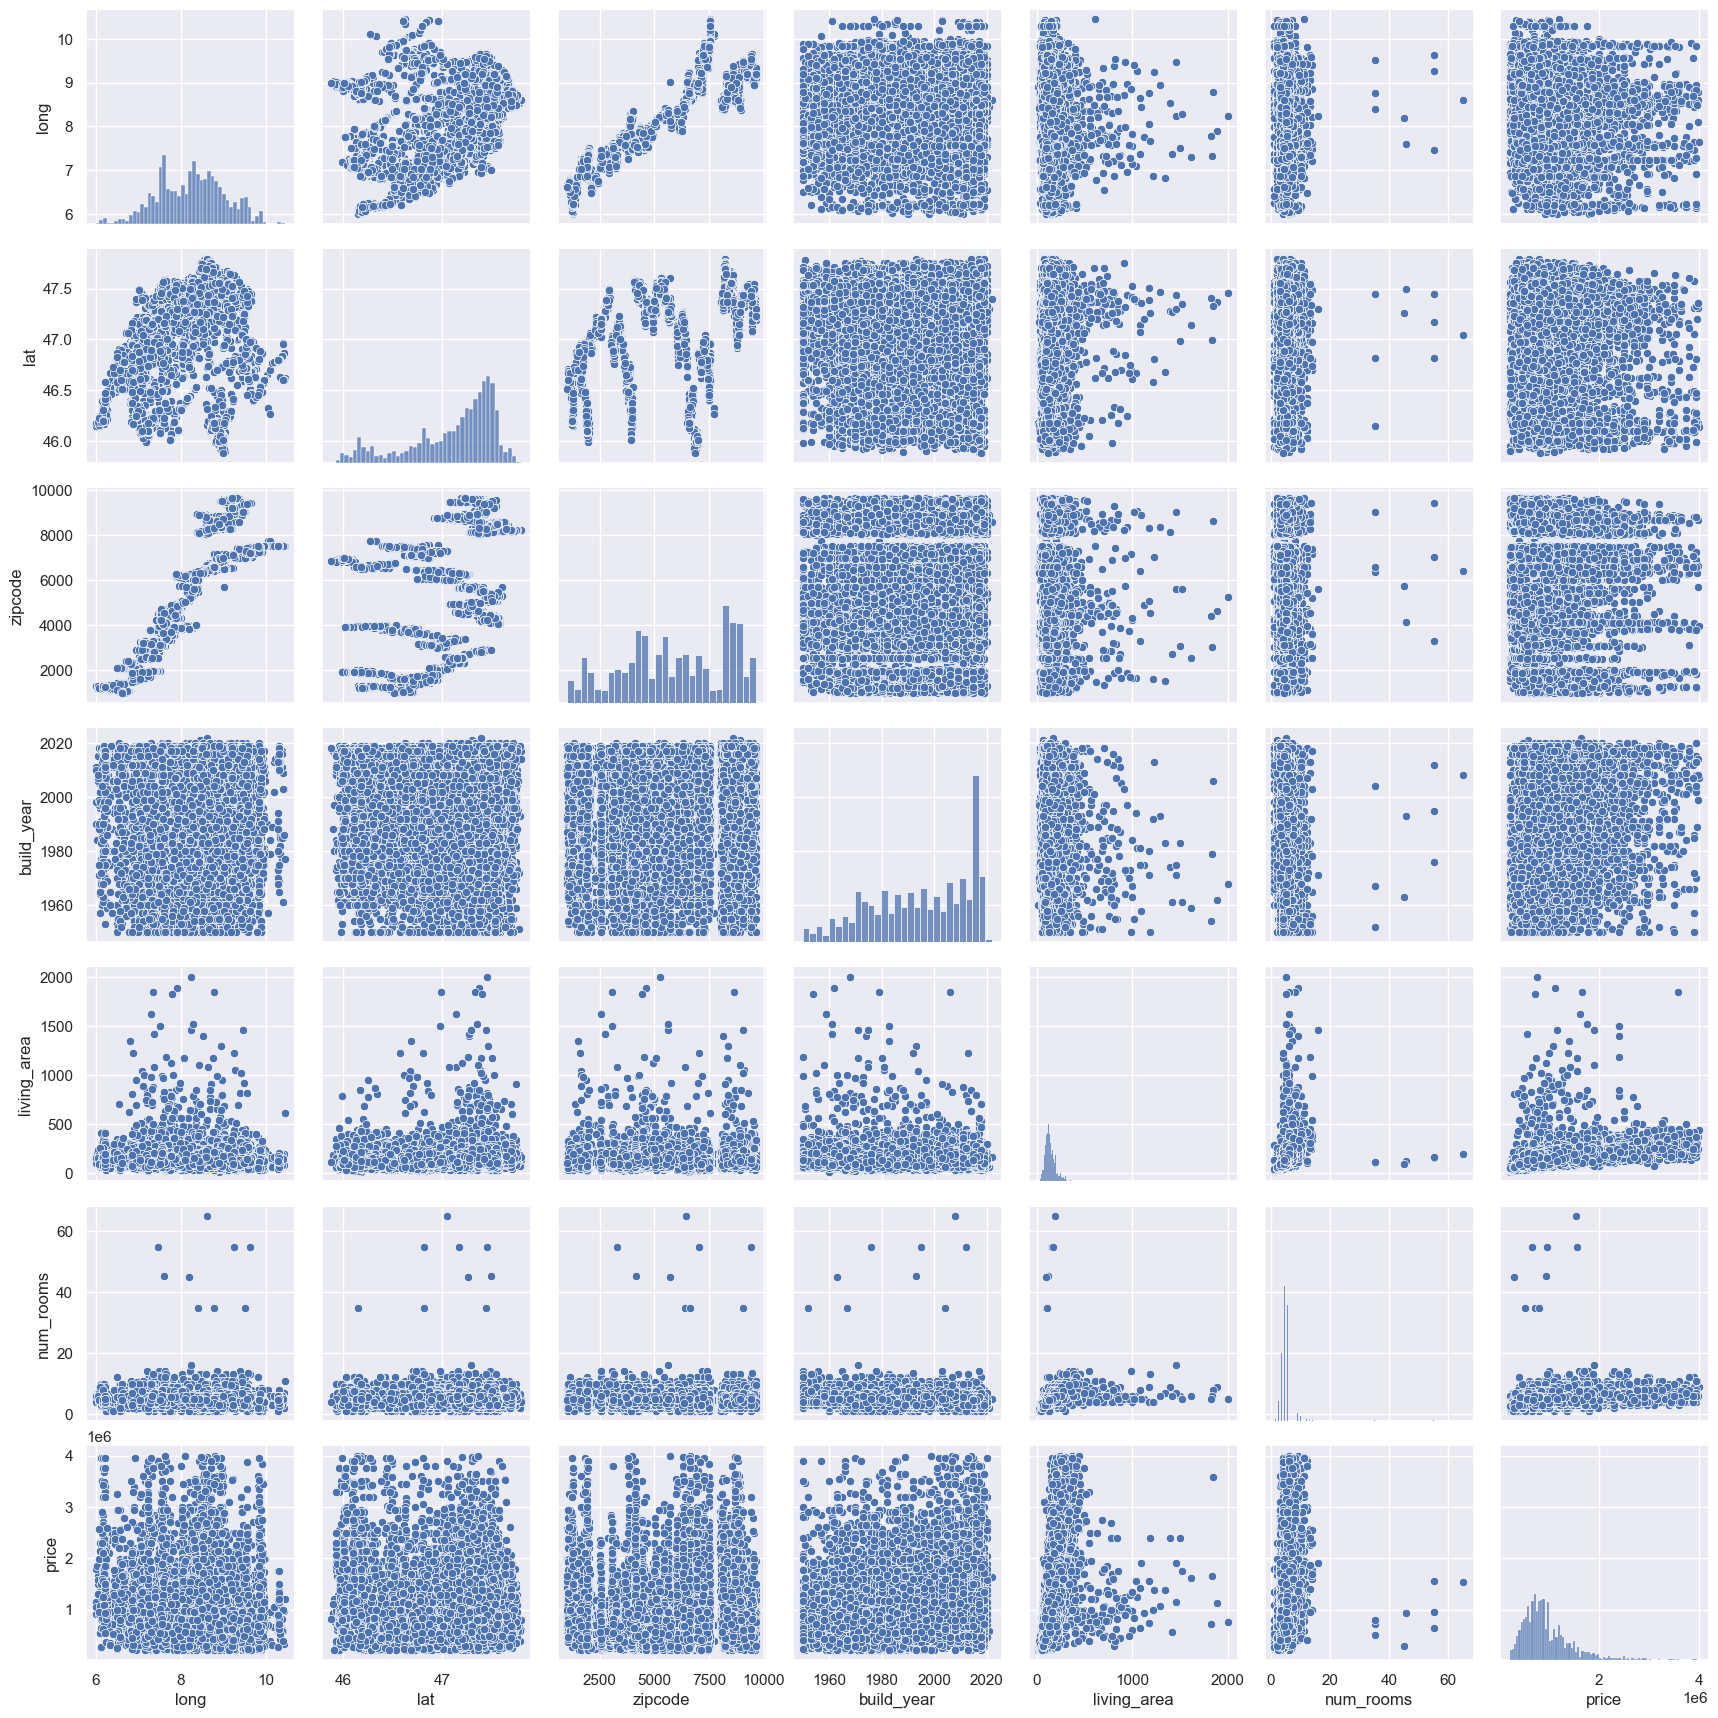

In [35]:
sns.pairplot(df)
#_ = plt.title("Pairplot of all numeric features")

In [37]:
#######################################
# Export to CSV
#######################################
from pathlib import Path
file_name = "../data/houses_train_analysed.csv"
file_path = (Path().resolve() / file_name).as_posix()
df.to_csv(file_path, index=False)